[View in Colaboratory](https://colab.research.google.com/github/stanimman/Simple/blob/master/PyTorch.ipynb)

In [1]:
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision
import torch
print(torch.__version__)
print(torch.cuda.is_available())

0.4.0
True


In [0]:
import torch 
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms

In [3]:
# Create tensors.
x = torch.tensor(1, requires_grad=True)
w = torch.tensor(2, requires_grad=True)
b = torch.tensor(3, requires_grad=True)

# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

# Compute gradients.
y.backward()

# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 

tensor(2)
tensor(1)
tensor(1)


In [4]:
# Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# Build a fully connected layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# Forward pass.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item())

# Backward pass.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

# 1-step gradient descent.
optimizer.step()

# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

w:  Parameter containing:
tensor([[ 0.3198,  0.4820, -0.2685],
        [ 0.1167,  0.3881,  0.1796]])
b:  Parameter containing:
tensor([-0.3936,  0.3638])
loss:  0.8711881637573242
dL/dw:  tensor([[ 0.4784,  0.0350, -0.2091],
        [ 0.1972,  0.0892,  0.5245]])
dL/db:  tensor([-0.8244,  0.3222])
loss after 1 step optimization:  0.8574962615966797


In [41]:
# My Code of Linear regression - Define sample with increasing y
np.random.seed(5)
a = np.random.randn(5,4)
print('a :', a)
x = torch.from_numpy(a)
x = x.type(torch.float)
#x = torch.randn(10,4)
y = torch.tensor([[2.0],[4.0], [6.0],[10.0],[12.0]])

print('x : ', x)
print('y : ', y)
print('x_shape : ', x.shape)
print('y_shape : ', y.shape) 


a : [[ 0.44122749 -0.33087015  2.43077119 -0.25209213]
 [ 0.10960984  1.58248112 -0.9092324  -0.59163666]
 [ 0.18760323 -0.32986996 -1.19276461 -0.20487651]
 [-0.35882895  0.6034716  -1.66478853 -0.70017904]
 [ 1.15139101  1.85733101 -1.51117956  0.64484751]]
x :  tensor([[ 0.4412, -0.3309,  2.4308, -0.2521],
        [ 0.1096,  1.5825, -0.9092, -0.5916],
        [ 0.1876, -0.3299, -1.1928, -0.2049],
        [-0.3588,  0.6035, -1.6648, -0.7002],
        [ 1.1514,  1.8573, -1.5112,  0.6448]])
y :  tensor([[  2.],
        [  4.],
        [  6.],
        [ 10.],
        [ 12.]])
x_shape :  torch.Size([5, 4])
y_shape :  torch.Size([5, 1])


In [42]:
# Define Linear Model give Input(No. of feature) and output 

model = nn.Linear(4,1) # We try to predict the value on output (eg: House price ) with four given feature (room size, etc..)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(),lr=.001) # linear parameters are w, b which we get using linear.weight , linear.bias
print ('Weight & Bias Before Training ',model.weight,'&', model.bias)
for epoch in range(700):
  # Forward_pass
  pred = model(x) # give the data to calculate forward linear layer

  loss = criterion(pred,y) # compare prediction vs actuals
  if epoch == 699 :
    print ('Epoch : loss ' , epoch, loss.item())

  # Make gradient to be zero
  optimizer.zero_grad()

  # Backward pass  Auto differntiation not much of an worry
  loss.backward()

  #Update using optimizer after calculating loss
  optimizer.step()


Weight & Bias Before Training  Parameter containing:
tensor([[ 0.4892, -0.3781,  0.2221, -0.0857]]) & Parameter containing:
tensor([ 0.4086])
Epoch : loss  699 60.71684646606445


In [43]:
# After Training I am trying to predict for a known x = 0.4412, -0.3309,  2.4308, -0.2521

x_test = torch.tensor([[0.4412, -0.3309,  2.4308, -0.2521]])
print (x_test.shape)
x_test = x_test.type(torch.float)
y_test = model(x_test)
print (x_test , y_test)
print (model.weight, model.bias)

torch.Size([1, 4])
tensor([[ 0.4412, -0.3309,  2.4308, -0.2521]]) tensor([[ 1.3111]])
Parameter containing:
tensor([[ 0.4892, -0.3781,  0.2221, -0.0857]]) Parameter containing:
tensor([ 0.4086])


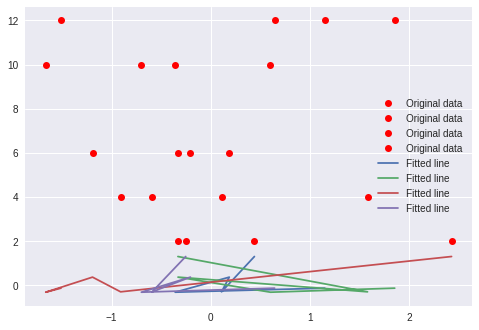

In [53]:
# Verification using Graph
import matplotlib.pyplot as plt
Predicted_y = model(x)
predicted = Predicted_y.detach().numpy() # converting to numpy
y_new = np.array([[2.0],[4.0], [6.0],[10.0],[12.0]])
plt.plot(a, y_new, 'ro', label='Original data')
plt.plot(a, predicted, label='Fitted line')
plt.legend()
plt.show()

In [0]:
# Should not have tried for more than 2 dimensions still good to see some weird visualiazation

In [0]:
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

In [0]:
# Logistic Regression for MNIST
# Hyper-parameters 
input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [56]:
# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

Processing...
Done!


0 torch.Size([1, 28, 28]) torch.Size([])
tensor(5)
torch.Size([1, 784])
1 torch.Size([1, 28, 28]) torch.Size([])
tensor(0)
torch.Size([1, 784])
2 torch.Size([1, 28, 28]) torch.Size([])
tensor(4)
torch.Size([1, 784])


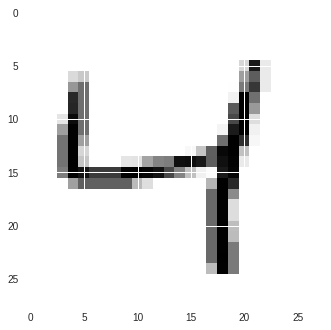

In [80]:
# Our data is in dataset as a tuple , x(images) , y(labels) 
for i in range(len(train_dataset)):
    sample = train_dataset[i]

    print(i, sample[0].size(), sample[1].size())
    print(sample[1])
    reshaped_Image = sample[0].reshape(-1,28*28)
    print(reshaped_Image.shape)
    img = sample[0].numpy()
    two_d = (np.reshape(img, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    #imgplot = plt.imshow(img)
    if i == 2:
        break

In [68]:
# https://www.youtube.com/watch?v=zN49HdDxHi8&list=PLYhW1ajuwgHdF9tWF_QfjcgGkK4C2rcYv&index=6 
# Know about data loader A format to process the dataset very fast 
# Define Dataset in a specific format from the dataset use a dataloader to feed in data in batch 
for i, (imageslearn, labelslearn) in enumerate(train_loader):
  imageslearn, labelslearn = train_loader
  break 

ValueError: ignored

In [0]:
# Logistic regression model No change in forward path
model = nn.Linear(input_size, num_classes)

In [0]:
# Loss and optimizer
# nn.CrossEntropyLoss() computes softmax internally 
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  


In [59]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, 28*28)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 2.2349
Epoch [1/5], Step [200/600], Loss: 2.1444
Epoch [1/5], Step [300/600], Loss: 2.0707
Epoch [1/5], Step [400/600], Loss: 1.9911
Epoch [1/5], Step [500/600], Loss: 1.9063
Epoch [1/5], Step [600/600], Loss: 1.7988
Epoch [2/5], Step [100/600], Loss: 1.7157
Epoch [2/5], Step [200/600], Loss: 1.5781
Epoch [2/5], Step [300/600], Loss: 1.6202
Epoch [2/5], Step [400/600], Loss: 1.5734
Epoch [2/5], Step [500/600], Loss: 1.6033
Epoch [2/5], Step [600/600], Loss: 1.5234
Epoch [3/5], Step [100/600], Loss: 1.4260
Epoch [3/5], Step [200/600], Loss: 1.3569
Epoch [3/5], Step [300/600], Loss: 1.4186
Epoch [3/5], Step [400/600], Loss: 1.2569
Epoch [3/5], Step [500/600], Loss: 1.2653
Epoch [3/5], Step [600/600], Loss: 1.1690
Epoch [4/5], Step [100/600], Loss: 1.2391
Epoch [4/5], Step [200/600], Loss: 1.1172
Epoch [4/5], Step [300/600], Loss: 1.1254
Epoch [4/5], Step [400/600], Loss: 1.1859
Epoch [4/5], Step [500/600], Loss: 1.1405
Epoch [4/5], Step [600/600], Loss:

In [60]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))


Accuracy of the model on the 10000 test images: 83 %


In [0]:
# Save the model checkpoint
torch.save(model.state_dict(), 'model1.ckpt')